<big><b>Text Mining and Sentiment Analysis on [Drugs Review from UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/461/drug+review+dataset+druglib+com)</b>
</big>
<br/> 3107 Instances and 9 variables<br/>
**Variables Information**
1. column1: ID column
2. urlDrugName (categorical): name of drug
3. condition (categorical): name of condition
4. benefitsReview (text): patient on benefits
5. sideEffectsReview (text): patient on side effects
6. commentsReview (text): overall patient comment
7. rating (numerical): 10 star patient rating
8. sideEffects (categorical): 5 step side effect rating
9. effectiveness (categorical): 5 step effectiveness rating
<br/>
<big><b>
Contains 3 implementations

•	Part One is Text Mining: Training a Classification Model for Drugs Review dataset using Naive Bayes MultinomialNB Classifier<br/>
•	Part Two is Sentiment Analysis(Here, the Output DataFrame is also stored in a CSV file named as "drugsreview_df.csv" for further investigation specific to each Drug)<br/>
•	Part Three: Sentiment Analysis using Textblob Python library(Here, the Output DataFrame is also stored in a CSV file named as "Sentiment_Polarity.csv" for further investigation specific to each Drug)<br/></b>
</big>

**Part One: Training a Classification Model on the Drugs Review dataset using Naive Bayes MultinomialNB Classifier**

<b> Installed nltk package using "pip install nltk" command</b>

In [ ]:
#pip install nltk

<b> Importing required nltk packages to perform Text mining & Sentiment analysis </b>

In [ ]:
#Installed the nltk library using "pip install nltk"  before importing it
#Importing the Required Libraries.
#NumPy for array. Pandas for DataFrame., MatplotLib  & Seaborn for visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#imorted re for regular expression support
import re
# WordCloud library is used to create tag clouds
from wordcloud import WordCloud
#imported specific packages from nltk library to perform data pre-processing involved in the Text mining & Sentiment analysis
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
#Could download all packages of nltk if required using below command
#nltk.download('all')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**Data Pre-processing Step: This involves the following steps<br/>**
1) Reading the data,
2) Exploring the Dataset
3) Combining the 3 reviews columns(benefitsReview, sideEffectsReview, commentsReview) in to one column named 'combinedReviews'<br/>
4) Handling Missing(Nan) values<br/>
5) Creating a new calculated column named "score_label" based on values in "rating" column (rating < 5 is 0 and rating >= 5 is 1)<br/>
6) Here, 3 datapreprocessing steps are specific to Text mining are done <br/>
A)Tokenizing the words<br/>
B)Stop word removal<br/>
C)Applying stemming technique on the cleaned tokens<br/>
Here, the combined result of steps of A, B and C are stored in a new column named 'processed_combinedReviews'<br/>
7)Finally, Generating the Term Frequency Matrix using CountVectorizer on the 'processed_combinedReviews' column.<br/>
This Matrix is set as 'X' parameter and 'score_label' is set as Y for the model training before Splitting the dataset to training and testing data<br/>
Note: Target Class imbalance is addressed after splitting the data


#Two functions used
#1.Function named "TM_text_preprocess" to perform text data preprocessing steps on the given text(Comments)
# these Data Preprocessing steps are specific to Text mining. They are,
# A)Tokenizing the words, B)Stop word removal and C)Applying stemming technique on the cleaned words
# Here, the combined result of steps of A, B and C are stored in a new column named 'processed_combinedReviews'

#2. Function to calculate sentiment scores, concatenating if the values are in list[] and handling empty strings
#def calculate_sentiment_scores(row):

<b>Collecting the Stop words from Corpus</b>

In [ ]:
#Collecting the Stop words from Corpus
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<b>Definition of a Function named "TM_text_preprocess" to perform text data preprocessing steps on the given text(Comments)
these Data Preprocessing steps are specific to Text mining. They are,<br/>
A)Tokenizing the words, <br/>B)Stop word removal and <br/>C)Applying stemming technique on the cleaned words<br/>
 Here, the combined result of steps of A, B and C are stored in a new column named 'processed_combinedReviews'</b>

In [ ]:
#Definition of a Function named "TM_text_preprocess" to perform text data preprocessing steps on the given text(Comments)
# these Data Preprocessing steps are specific to Text mining. They are,
# A)Tokenizing the words, B)Stop word removal and C)Applying stemming technique on the cleaned words
# Here, the combined result of steps of A, B and C are stored in a new column named 'processed_combinedReviews'
def TM_text_preprocess(text_data):
  #A)Tokenizing the words
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text_data)
  # B)Stop word removal: Removing the Stop words belonging to corpus from tokenized list of text
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  # C)Applying stemming technique on the Cleaned Tokens
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text


<b> Loading the Drugs review csv dataset into pandas DataFrame </b>

In [ ]:
#Step1: Reading the .csv file named: "Drug_review_uci.csv" into a Dataframe using the Pandas Library
drugsreview_df = pd.read_csv("Drug_review_uci.csv")#, sep="\t",header=None)

#Listing the first 5 rows using head() function
drugsreview_df.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


<b> Exploring the Dataset by Displaying the dimension of the drugsreview_df Dataframe</b>

In [ ]:
#Step2: Exploring the Dataset by Displaying the dimension of the drugsreview_df Dataframe
drugsreview_df.shape
#3107 Rows and 9 columns

(3107, 9)

<b> Listing the information of the dataframe such as column names and their data types</b>

In [ ]:
#Listing the information of the dataframe such as column names and their data types
drugsreview_df.info()
#all columns are character/string datatype variables except Column1 and rating which are Numeric Integer datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Column1            3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


<b> Listing the statistical information of the dataframe using describe() function to list the
statistical information sucha as count, min, max, average(mean), median, standard deviation, quartiles: 25%, 50% and 75%</b>

In [ ]:
#Listing the statistical information of the dataframe using describe() function to list the
#statistical information sucha as count, min, max, average(mean), median, standard deviation, quartiles: 25%, 50% and 75%
drugsreview_df.describe()

,Column1,rating
count,3107.000000,3107.000000
mean,2080.607016,7.006115
std,1187.998828,2.937582
min,0.000000,1.000000
25%,1062.500000,5.000000
50%,2092.000000,8.000000
75%,3092.500000,9.000000
max,4161.000000,10.000000


<b>Step3: Combining the 3 reviews columns(benefitsReview, sideEffectsReview, commentsReview) in to one column named 'combinedReviews'</b>

In [ ]:
#Step3: Combining the 3 reviews columns(benefitsReview, sideEffectsReview, commentsReview) in to one column named 'combinedReviews'
drugsreview_df['combinedReviews'] = drugsreview_df['benefitsReview'].astype(str) + ' ' + \
                                     drugsreview_df['sideEffectsReview'].astype(str) + ' ' + \
                                     drugsreview_df['commentsReview'].astype(str)

<b>Step4: Veriying & Handling the Missing (NaN) values</b>

In [ ]:
#Step4: Veriying & Handling the Missing (NaN) values
drugsreview_df.isnull().sum()
#There are 2 null values in "sideEffectsReview", 8 in "commentsReview" and 1 in "condition"

Column1              0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
combinedReviews      0
dtype: int64

<b> Exploring the rows having the Missing (NaN) values. Listing the rows those have Null/missing values</b>

In [ ]:
#Exploring the rows having the Missing (NaN) values
drugsreview_df[drugsreview_df.isnull().any(axis=1)]

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews
147,1906,doxycycline,4,Moderately Effective,Severe Side Effects,epididymitus,Treatment cleared up the infection.,Treatment ended 2 months ago and have still go...,NaN,Treatment cleared up the infection. Treatment ...
400,1947,hyzaar,8,Highly Effective,Moderate Side Effects,hypertension,Pills helped to lower my blood pressure. Also...,"Back pain, especially after a missed dose. In...",NaN,Pills helped to lower my blood pressure. Also...
407,851,ritalin-la,8,Considerably Effective,Mild Side Effects,adhd,This medication enabled me to think clearly. ...,"This medication caused me to be nervous, tremb...",NaN,This medication enabled me to think clearly. ...
1238,645,seasonique,9,Highly Effective,Mild Side Effects,prevent menstral migranes,Experienced 1 migrane in the past year since o...,Noticed light skin iritation. Take the light ...,NaN,Experienced 1 migrane in the past year since o...
1468,647,seasonique,4,Considerably Effective,Moderate Side Effects,preventing pregnancy,preventing pregnancy,This pill was great b/c i didn't have any peri...,NaN,preventing pregnancy This pill was great b/c i...
1965,2755,xenical,3,Marginally Effective,No Side Effects,over weight,i have been on xenical for a little over 2 wee...,i dont have any other then now i am constipated,NaN,i have been on xenical for a little over 2 wee...
2402,3209,levothroid,10,Highly Effective,No Side Effects,thyroid,balancing of thyroid back to normal range. Pri...,NaN,.1mg daily orally.,balancing of thyroid back to normal range. Pri...
2488,3784,keflex,2,Ineffective,No Side Effects,NaN,None. I had a bacterial infection accompanyin...,The only good point I suppose is that there wa...,Absoutely innefective. I easily could have be...,None. I had a bacterial infection accompanyin...
2705,736,flonase,8,Considerably Effective,No Side Effects,plugged up nose related to seasonal allergies,cleared up nose,none,NaN,cleared up nose none nan
2891,1874,doxycycline,6,Moderately Effective,No Side Effects,acne,Controlled acne breakouts to some extent when ...,NaN,Took Doxylin 50 mg once daily for 3 months. I...,Controlled acne breakouts to some extent when ...


<b> Filling missing values with Empty string</b>

In [ ]:
#Filling missing values with Empty string
#There are 2 null values in "sideEffectsReview", 8 in "commentsReview" and 1 in "condition"
drugsreview_df['sideEffectsReview'] = drugsreview_df['sideEffectsReview'].fillna('')
drugsreview_df['commentsReview'] = drugsreview_df['commentsReview'].fillna('')
drugsreview_df['condition'] = drugsreview_df['condition'].fillna('')

In [ ]:
#Verifying the the rows having the Missing (NaN) values
drugsreview_df[drugsreview_df.isnull().any(axis=1)]

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews


<b> No Missing values now. Missing values handled successfully!</b>

<b>Step5: Creating a new calculated column named "score_label" based on values in "rating" column (rating < 5 is 0 and rating >= 5 is 1)</b>

In [ ]:
#Step5:Creating a new calculated column named "score_label" based on values in "rating" column (rating < 5 is 0 and rating >= 5 is 1)
drugsreview_df['score_label'] = drugsreview_df['rating'].apply(lambda x: 0 if x < 5 else 1)

<b> Printing the count of Score label of 1's and 0's. Found existence of Target Class imbalance 661 0's and 2446 1's</b>

In [ ]:
print("Count of Grouped Score_label\n")
drugsreview_df.groupby('score_label').count()
#There exist a Target Class imbalance 661 0's and 2446 1's

Count of Grouped Score_label



,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews
score_label,,,,,,,,,,
0,661,661,661,661,661,661,661,661,661,661
1,2446,2446,2446,2446,2446,2446,2446,2446,2446,2446


<b>Displaying the Count of unique values in the "score_label" which is the Target column. </b>

<Axes: xlabel='score_label', ylabel='count'>

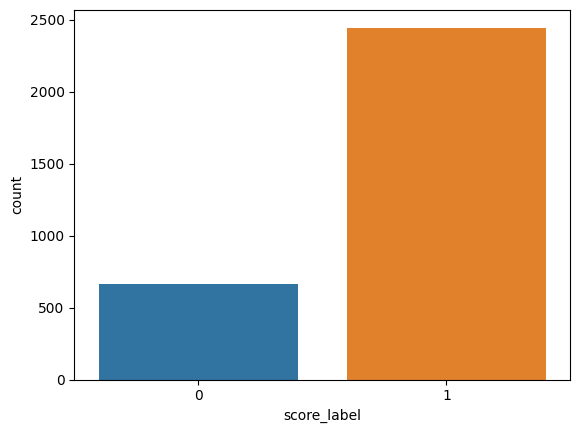

In [ ]:
#Displaying the Count of unique values in the "score_label" which is the Target column.
sns.countplot(x=drugsreview_df["score_label"])
#From the below plot there exist a significant Target class imbalance.
#This will be address after splitting the dataset into training and testing data and before implementing the Model training

<b> Step6: Here, the Data Preprocessing step specific to Text mining are done
<br/>
  A)Tokenizing the words, B)Stop word removal and C)Applying stemming technique on the cleaned words<br/>
  Here, the combined result of steps of A, B and C are stored in a new column named 'processed_combinedReviews'</b>

In [ ]:
#Step6: Here, the Data Preprocessing step specific to Text mining are done
# A)Tokenizing the words, B)Stop word removal and C)Applying stemming technique on the cleaned words
# Here, the combined result of steps of A, B and C are stored in a new column named 'processed_combinedReviews'
drugsreview_df['processed_combinedReviews']  = drugsreview_df['combinedReviews'].apply(TM_text_preprocess)

<b>Exploring the drugsreview_df dataframe after adding score_label and processed_combinedReviews columns </b>

In [ ]:
#Exploring the drugsreview_df dataframe
drugsreview_df.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews,score_label,processed_combinedReviews
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...,0,"[slow, progress, left, ventricular, dysfunct, ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...,0,"[although, type, birth, control, con, pro, hel..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...,1,"[use, cramp, badli, would, leav, ball, bed, le..."
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...,0,"[acid, reflux, went, away, month, day, drug, h..."
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...,0,"[think, lyrica, start, help, pain, side, effec..."


In [ ]:
drugsreview_df.iloc[:,8:9].head()

#count(data)

,commentsReview
0,"monitor blood pressure , weight and asses for ..."
1,"I Hate This Birth Control, I Would Not Suggest..."
2,I took 2 pills at the onset of my menstrual cr...
3,I was given Prilosec prescription at a dose of...
4,See above


<b>Step7: Generating the Term Frequency Matrix using CountVectorizer of Scikit Learn package (sklearn.feature_extraction.text) on the 'processed_combinedReviews' column</b>

In [ ]:
#Step7: Generating the Term Frequency Matrix using CountVectorizer of Scikit Learn package (sklearn.feature_extraction.text)
#on the 'processed_combinedReviews' column
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(drugsreview_df['processed_combinedReviews'].map(''.join))
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4258,4259,4260,4261,4262,4263,4264,4265,4266,4267
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Spliting the Dataset into Training and Testing data to implement the Test mining**

In [ ]:
#Spliting the Dataset into Training and Testing data
from sklearn.model_selection import train_test_split
y = drugsreview_df['score_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=99)

In [ ]:
y_test

272     0
1414    1
3056    1
2811    0
187     1
       ..
674     1
2909    1
2081    1
2289    1
2922    1
Name: score_label, Length: 622, dtype: int64

**Addressing the Target class imbalance using the RandomUnderSampler method**

<Axes: xlabel='score_label', ylabel='count'>

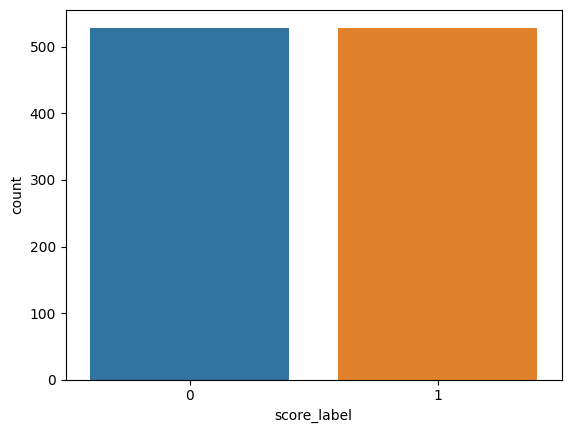

In [ ]:
#Addressing the Target class imbalance using the RandomUnderSampler method of imblearn.under_sampling package
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train_undersampled)

<b>Instantiating a model object of Naïve Bayes's MultinomialNB
Classifier belonging to Scikit Learn package </b>

In [ ]:
#Instantiating an object for the Naïve Bayes's MultinomialNB Classifier model belonging to Scikit Learn package
from sklearn.naive_bayes import MultinomialNB
drugs_MultinomialModel = MultinomialNB()
#training the model instance on the training dataset using the fit() method
drugs_MultinomialModel.fit(X_train_undersampled, y_train_undersampled)
# MultinomialNB()

MultinomialNB()

**Predicting on the Test dataset**

In [ ]:
#Predicting on the Test dataset
y_pred_drugs = drugs_MultinomialModel.predict(X_test)

In [ ]:
#listing the first 20 items of the predicted y_pred_drugs array
y_pred_drugs[1:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Evaluating the Trained Model by validating the Metrics**

In [ ]:
#Evaluating the Trained Model by Computing the Accuracy score and printing the Confusion Matrix
#and classification Report of the Trained MultinomialNB model
from sklearn import metrics
accuracy_score= metrics.accuracy_score(y_test, y_pred_drugs)
print("Accuracy of Drugs Review - MultinomialNB model:%.2f\n\n"%(accuracy_score))
drugs_CM = metrics.confusion_matrix(y_test, y_pred_drugs)
print("Confusion Matrix of Drugs Review - MultinomialNB model:\n ", drugs_CM,"\n\n")
class_report_result = metrics.classification_report(y_test, y_pred_drugs)
print("Classification Report of Drugs Review using MultinomialNB model: \n", class_report_result)
#Accuracy of Drugs Review - MultinomialNB model:0.79


Accuracy of Drugs Review - MultinomialNB model:0.79


Confusion Matrix of Drugs Review - MultinomialNB model:
  [[  0 132]
 [  0 490]] 


Classification Report of Drugs Review using MultinomialNB model: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.79      1.00      0.88       490

    accuracy                           0.79       622
   macro avg       0.39      0.50      0.44       622
weighted avg       0.62      0.79      0.69       622



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


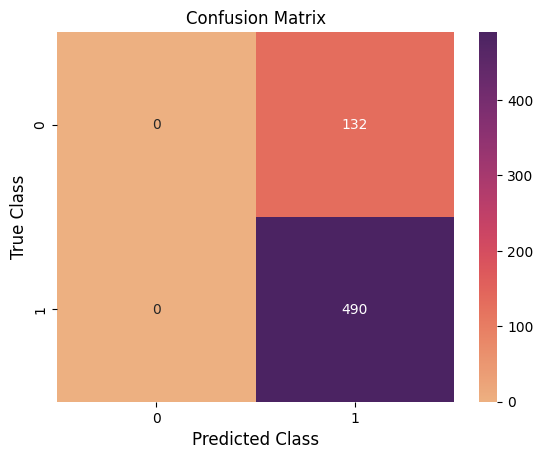

In [ ]:
ax = sns.heatmap(drugs_CM, cmap="flare", annot=True, fmt="d")
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [ ]:
# Printing the Individual values of True positive, True Negative, False Positive, false negative of the Confusion matrix
tn, fp, fn, tp = drugs_CM.ravel()
print("True Positive:The model identified ", tp ,"records as positive reviews. ")
print("True Negative: The model identified ", tn ,"records as negative reviews. ")
print("False Positive: ", fp ,"are instances where the model predicted the positive reviews incorrectly. ")
print("False Negative: ", fn ," These are instances where the model predicted the negative reviews incorrectly. ")

True Positive:The model identified  490 records as positive reviews. 
True Negative: The model identified  0 records as negative reviews. 
False Positive:  132 are instances where the model predicted the positive reviews incorrectly. 
False Negative:  0  These are instances where the model predicted the negative reviews incorrectly. 


<b>The Accuracy score of 79% is significantly good means that 79% of the predictions across both classes are correct. <br/><br/>
Class 0: <br/>
<p align="justify">

Precision (also called Positive Predictive Value): The precision for class 0 is 0.00, which means that when the model predicts a sample to be in class 0, it could be always incorrect. The model is not good at correctly identifying true negatives for class 0. <br/>
Recall (also called Sensitivity or True Positive Rate): Recall for class 0 is 0.00, indicating that the model cannot capture any of the true negatives for class 0. Thus, this model is not effective at identifying instances of class 0.
<br/><br/>
Class 1:<br/>
Precision: Precision for class 1 is 0.79, suggesting that when the model predicts a sample to be in class 1, it is correct about 79% of the time. The model is relatively good at identifying true positives for class 1.
Recall: Recall for class 1 is 1.00, indicating that the model captures all the true positives for class 1. It correctly identifies all instances of class 1.
<br/>
Thus, This model is doing well in predicting class 1 (high precision and recall), but it performs poorly for class 0, likely due to a lack of true negatives being identified
<br/>
</b>
</p>

**Part Two: Sentiment Analysis**

<b>Exploring the drugsreview_df dataframe</b>

In [ ]:
#Exploring the drugsreview_df dataframe
drugsreview_df.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews,score_label,processed_combinedReviews
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...,0,"[slow, progress, left, ventricular, dysfunct, ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...,0,"[although, type, birth, control, con, pro, hel..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...,1,"[use, cramp, badli, would, leav, ball, bed, le..."
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...,0,"[acid, reflux, went, away, month, day, drug, h..."
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...,0,"[think, lyrica, start, help, pain, side, effec..."


<b>Performing the Sentiment Analysis by calculating the Sentiment Scores
using the SentimentIntensityAnalyzer of the nltk.sentiment.vader package and storing the resulting Scores of Compound, Negative, Neutral and Positive in separate columns of the same DataFrame</b>

In [ ]:
#Performing the Sentiment Analysis by calculating the Sentiment Scores
#using the SentimentIntensityAnalyzer of the nltk.sentiment.vader package
#importin the SentimentIntensityAnalyzer class  from the nltk.sentiment.vader python package
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Creating an instance for the SentimentIntensityAnalyzer class
sentiment = SentimentIntensityAnalyzer()
#drugsreview_df = drugsreview_df_org.copy()

# Function to calculate sentiment scores, concatenating if the values are in list[] and handling empty strings
def calculate_sentiment_scores(review_txt):
    if isinstance(review_txt, str) and review_txt:
        return sentiment.polarity_scores(review_txt)
    elif isinstance(review_txt, list) and review_txt:
        #When the input entries are lists[] (if already processed through TM_text_preprocess()),
        #it concatenates them into a single string before performing sentiment analysis.
        return sentiment.polarity_scores(' '.join(review_txt))
    else:
        # Handling Empty strings: If the comment is empty or a list is empty then it returns a default dictionary
        return {'compound': 0, 'neg': 0, 'neu': 0, 'pos': 0}

#Score parameters standard names for compound, Negative, Neutral and Positive are compound, neg, neu, pos
# Applying  the function calculate_sentiment_scores() on the 'combinedReviews' column
sentiment_scores = drugsreview_df['combinedReviews'].apply(calculate_sentiment_scores)


#Extracting the values from the dictionary and create a new column within the dataframe for the sentiment scores
drugsreview_df['Compound'] = [score['compound'] for score in sentiment_scores]
drugsreview_df['Negative'] = [score['neg'] for score in sentiment_scores]
drugsreview_df['Neutral'] = [score['neu'] for score in sentiment_scores]
drugsreview_df['Positive'] = [score['pos'] for score in sentiment_scores]


<b> The Score interpretations of the 4 newly created sentiment score columns Compound, Negative, Neutral and Positive are given below:</b>

**Compound Score:**

It represents the overall sentiment of the text.
The 'compound' score ranges from -1 (most negative) to 1 (most positive).
A value closer to 1 indicates positive sentiment, while a value closer to -1 indicates negative sentiment. <br/>
**Negative Score ('neg'):**

It represents the proportion of the text that is considered negative.
The 'neg' score ranges from 0 to 1, where 0 means no negative sentiment and 1 means entirely negative sentiment.
A higher 'neg' score suggests a higher proportion of negative words in the text.
<br/>
**Neutral Score ('neu'):**

It represents the proportion of the text that is considered neutral.
The 'neu' score ranges from 0 to 1, where 0 means no neutral sentiment and 1 means entirely neutral sentiment.
A higher 'neu' score suggests a higher proportion of neutral words in the text.
<br/>
**Positive Score ('pos'):**

It represents the proportion of the text that is considered positive.
The 'pos' score ranges from 0 to 1, where 0 means no positive sentiment and 1 means entirely positive sentiment.
A higher 'pos' score suggests a higher proportion of positive words in the text.

<br/>
Ref: Google

#The Output dataframe is also stored in a CSV file named as "drugsreview_df.csv" for further investigation specific to each Drug

In [ ]:
#The Output dataframe is also stored in a CSV file named as "drugsreview_df.csv" for further investigation specific to each Drug
drugsreview_df.to_csv('drugsreview_df.csv', index=False)

In [ ]:
drugsreview_df.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews,score_label,processed_combinedReviews,Compound,Negative,Neutral,Positive
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...,0,"[slow, progress, left, ventricular, dysfunct, ...",-0.9666,0.339,0.661,0.000
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...,0,"[although, type, birth, control, con, pro, hel...",-0.8945,0.141,0.818,0.040
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...,1,"[use, cramp, badli, would, leav, ball, bed, le...",0.6297,0.095,0.787,0.118
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...,0,"[acid, reflux, went, away, month, day, drug, h...",-0.6486,0.049,0.951,0.000
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...,0,"[think, lyrica, start, help, pain, side, effec...",-0.5719,0.106,0.859,0.035


<b>Reviewing the information on the newly created Sentiment Scores Columns of the drugsreview_df dataframe</b>

In [ ]:
#Reviewing the information on the newly created Sentiment Scores Columns of the drugsreview_df dataframe
drugsreview_df[['Compound','Negative','Neutral','Positive']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Compound  3107 non-null   float64
 1   Negative  3107 non-null   float64
 2   Neutral   3107 non-null   float64
 3   Positive  3107 non-null   float64
dtypes: float64(4)
memory usage: 97.2 KB


<b>Listing the statistical information on the newly created Sentiment Scores Columns </b>

In [ ]:
#Listing the statistical information on the newly created Sentiment Scores Columns in the dataframe using describe() function to list the
#statistical information sucha as count, min, max, average(mean), median, standard deviation, quartiles: 25%, 50% and 75%

drugsreview_df[['Compound','Negative','Neutral','Positive']].describe()

,Compound,Negative,Neutral,Positive
count,3107.000000,3107.000000,3107.000000,3107.000000
mean,-0.156879,0.109993,0.804833,0.085168
std,0.677840,0.071558,0.085835,0.058160
min,-0.998300,0.000000,0.284000,0.000000
25%,-0.808350,0.060000,0.753000,0.044000
50%,-0.329100,0.099000,0.812000,0.077000
75%,0.510600,0.148000,0.865000,0.118000
max,0.997000,0.634000,1.000000,0.623000


<b>Visualization of Data Distribution of the Compound scores of the combinedReviews column of the dataset using Histogram </b>

<Axes: xlabel='Compound', ylabel='Count'>

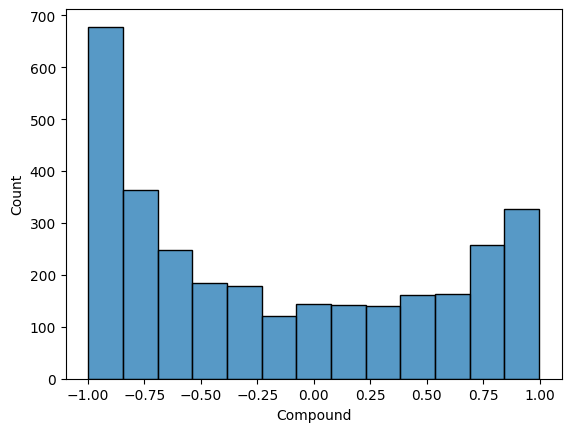

In [ ]:
#Visualization of Data Distribution of the Compound scores of the combinedReviews column using Histogram
sns.histplot(drugsreview_df['Compound'])
#Compound scores data are not normally distributed

<b> Visualization of Data Distribution of the Negative scores of the combinedReviews column using Histogram</b>

<Axes: xlabel='Negative', ylabel='Count'>

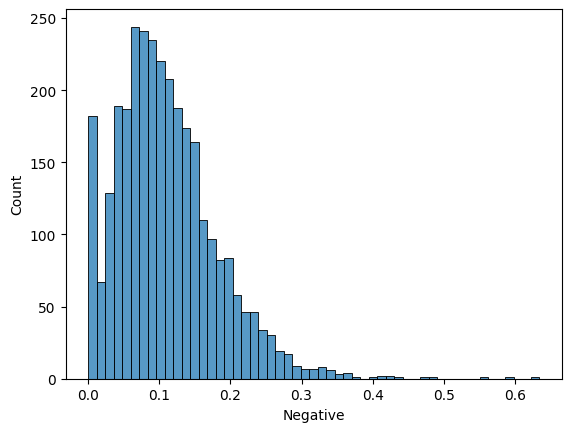

In [ ]:
#Visualization of Data Distribution of the Negative scores of the combinedReviews column using Histogram
sns.histplot(drugsreview_df['Negative'])
#Negative scores data are not normally distributed it is right skewed

<b>Visualization of Data Distribution of the Neutral scores of the combinedReviews column using Histogram </b>

<Axes: xlabel='Neutral', ylabel='Count'>

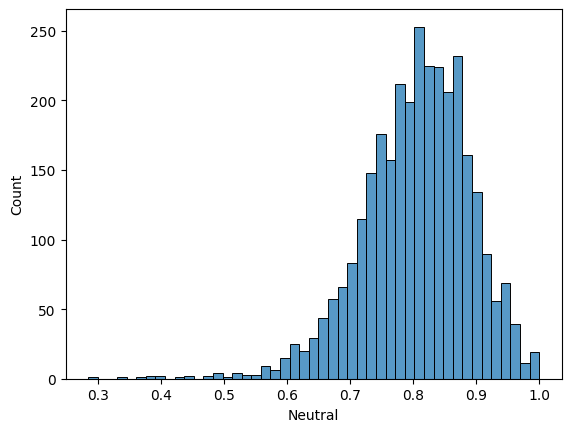

In [ ]:
#Visualization of Data Distribution of the Neutral scores of the combinedReviews column using Histogram
sns.histplot(drugsreview_df['Neutral'])
#Neutralscores data are not normally distributed it is left skewed

<b>Visualization of Data Distribution of the Positive scores of the combinedReviews column using Histogram </b>

<Axes: xlabel='Positive', ylabel='Count'>

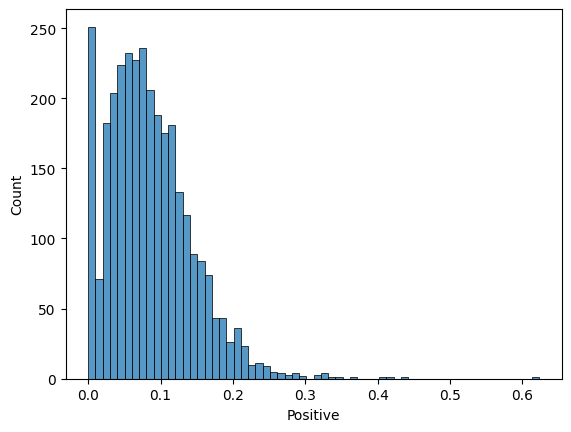

In [ ]:
#Visualization of Data Distribution of the Positive scores of the combinedReviews column using Histogram
sns.histplot(drugsreview_df['Positive'])
#Positive scores data are not normally distributed it is right skewed

<b>Exploring all the Compound score values of the "Negative reviews" (Compound <=0) of all the Drugs in the descending order of Compound score value </b>

In [ ]:
#Exploring all the Compound score values of the "Negative reviews" (Compound <=0) of all the Drugs
#in the descending order of Compound score value
# (reviews['compound']<=0).groupby(reviews['name']).sum()
# Total count of Drugs having negative reviews that is having 'compound' value less than or equal to zero
(drugsreview_df['Compound']<=0).groupby(drugsreview_df['urlDrugName']).sum().sort_values(ascending=False)

urlDrugName
lexapro           40
zoloft            30
prozac            28
paxil             28
propecia          26
                  ..
follistim          0
fosamax-plus-d     0
gonal-f-rff        0
qvar               0
zyvox              0
Name: Compound, Length: 502, dtype: int64

<b> Exploring all the Compound score values of the "Positive reviews" (Compound >0) of all the Drugs
in the descending order of Compound score value</b>

In [ ]:
#Exploring all the Compound score values of the "Positive reviews" (that is Compound >0) of all the Drugs
#in the descending order of Compound score value

# Total count of Drugs having Positive reviews that is having 'compound' greater than zero
(drugsreview_df['Compound']>0).groupby(drugsreview_df['urlDrugName']).sum().sort_values(ascending=False)
# drugsreview_df[drugsreview_df['Compound'] <= 0].groupby('urlDrugName').size()
#total_negative_compound_reviews

urlDrugName
retin-a       31
lexapro       23
synthroid     20
renova        20
vyvanse       19
              ..
quibron-t      0
ranitidine     0
rebif          0
reglan         0
phenergan      0
Name: Compound, Length: 502, dtype: int64

#From the above exploration it is obvious that the drug named “Lexapro” has more number of negative and positive reviews.

#Listing the Drugs and its count of negative reviews more than the threshold 0.5

In [ ]:
#Listing the Drugs and its count of negative reviews more than the threshold 0.5
(drugsreview_df['Negative']> 0.5).groupby(drugsreview_df['urlDrugName']).sum().sort_values(ascending=False)

urlDrugName
diovan         1
vicodin        1
tylenol        1
abilify        0
pilocarpine    0
              ..
elocon         0
elmiron        0
elidel         0
elavil         0
zyvox          0
Name: Negative, Length: 502, dtype: int64

#diovan, vicodin and tylenol are the drugs that as one number of severe negative review with threshold more than 0.5

<big>Deep Exploration</big><br/>
<b>Printing the Total count for each drug that have positive reviews more than the threshold 0.5</b>

In [ ]:
# Printing the Total count for each drug that have positive reviews more than the threshold 0.5
total_positive_neg_reviews = drugsreview_df[drugsreview_df['Positive'] > 0.5].groupby('urlDrugName').size().sort_values(ascending=False)

# Display the result as dataframe
print(total_positive_neg_reviews)

urlDrugName
viagra    1
dtype: int64


**From the above output the one and only Drug that has highest Positive review is "viagra" with Positive sentiment more that 0.5 value.**

In [ ]:
## Printing the Total count of drugs that have Positive reviews more than the threshold 0.5 # same as above
(drugsreview_df['Positive']> 0.5).groupby(drugsreview_df['urlDrugName']).sum().sort_values(ascending=False) #result is a list

urlDrugName
viagra         1
abilify        0
paxil-cr       0
plavix         0
pilocarpine    0
              ..
elmiron        0
elidel         0
elavil         0
efudex         0
zyvox          0
Name: Positive, Length: 502, dtype: int64

<b>Total count of negative reviews of each Drug having 'Negative' sentiment value greater than or equal to 0.5 </b>

In [ ]:
# Total count of negative reviews of each Drug having 'Negative' sentiment value greater than or equal to 0.5
total_negative_neg_reviews = (drugsreview_df['Negative'] > 0.5).groupby(drugsreview_df['urlDrugName']).count().sort_values(ascending=False)
#drugsreview_df[drugsreview_df['Negative'] >= 0.5].groupby('urlDrugName').size().sort_values(ascending=False)

# Display the result
print(total_negative_neg_reviews)

urlDrugName
lexapro         63
prozac          46
retin-a         45
zoloft          45
paxil           38
                ..
pamelor          1
penicillin-v     1
penlac           1
pepcid           1
zyvox            1
Name: Negative, Length: 502, dtype: int64


#From the above output the Drugs named lexapro leads first with 63 number of strong negative reviews followed by "Prozac" in second place with 46 number of strong negative reviews and "retina-a" in the third place with 45 number of strong negative reviews

In [ ]:
#Computing the Count of Unique Drugs
len(drugsreview_df['urlDrugName'].unique())
#There are totally 502 Unique Drugs in the Drugs review dataset

502

#There are totally 502 Unique Drugs in the Drugs review dataset

**compound** score in the Sentiment Analysis corresponds to the sum of the valence score of each word in the lexicon and determines the degree of the sentiment rather than the actual value as opposed to the previous ones. Its value is between -1 (most extreme negative sentiment) and +1 (most extreme positive sentiment).

<b>Computing the Count of Unique Drugs </b>

<b>
<p align='justify'>Computing the OverAll Compound Score Percentage on Negative Reviews of each Drug in the Drugs Review Dataset and storing as "% Negative reviews" column in the new dataframe "percent_negative_reviews". The total unique drugs in this negative review dataframe "percent_negative_reviews" is also 502 out of 3107 instances of records. This means all the Drugs give nin the "Drug_review_uci.csv" file have negative reviews. But the Part one Machine learning has not identified the Negative review at all since True Negative was zero in that. Hence, this proves that classification machine learning output alone will not be suffecient to discover the positive and negative sentiment of the given document, the Sentiment analysis is the powerful technique to discover the actual sentiment facts of the given docuemnt. </p></b>

In [ ]:
#Computing the OverAll Percentage of Negative Reviews of each Drug in the Drugs Review dataset
percent_negative_reviews = pd.DataFrame((drugsreview_df['Compound']<=0).groupby(drugsreview_df['urlDrugName']).sum()
                      /drugsreview_df['urlDrugName'].groupby(drugsreview_df['urlDrugName']).count() * 100,
                    columns=['% Negative reviews']).sort_values(by='% Negative reviews',ascending=False )

#Printing the Total Count of Drugs having Negative Reviews in the Drugs Review dataset
print("Total number of Negative Reviews in the Drugs Review dataset: ", len(percent_negative_reviews))
#There are totally 502 Unique Drugs in the Drugs review dataset.
#Thus, all 502 Drugs are having Negative Reviews out of 3107 instances of records

Total number of Negative Reviews in the Drugs Review dataset:  502


In [ ]:
#Listing the top 15 Drugs having highest percent of Negative Reviews
#in the Ascending order of drugs name and descending order of Compound score values
percent_negative_reviews.head(5)
#percent_negative_reviews.info()
#percent_negative_reviews.iloc[:0,]
#percent_negative_reviews['urlDrugName']

,% Negative reviews
urlDrugName,
glucophage-xr,100.0
depakene,100.0
triaz,100.0
metoclopramide,100.0
trileptal,100.0


#Barplot Visualization for the top 25 drugs having most Negative Reviews

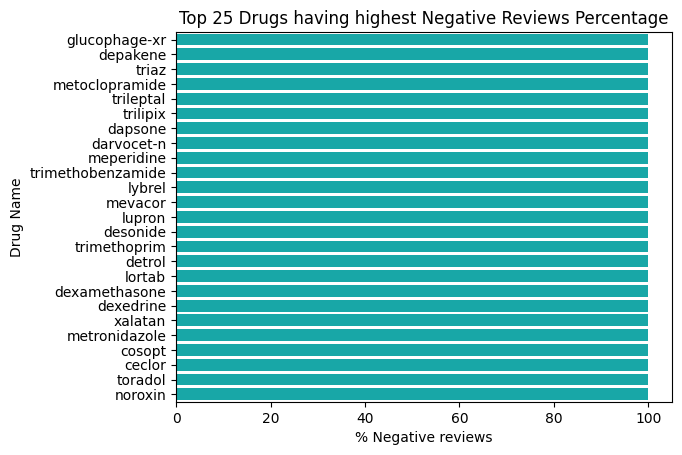

In [ ]:
#Barplot Visualization for the top 25 drugs having most Negative Reviews
#Calculating the top 25 drugs having most Negative Reviews
top_25_drugs_percent_NR = percent_negative_reviews.head(25)

# Plotting the horizontal bar plot on top 25 drugs having most Negative Reviews
sns.barplot(data=top_25_drugs_percent_NR, x='% Negative reviews', y=top_25_drugs_percent_NR.index, color='c')
plt.xlabel('% Negative reviews')
plt.ylabel('Drug Name')
plt.title('Top 25 Drugs having highest Negative Reviews Percentage')
plt.show()

##Computing the OverAll Percentage of Positive Reviews of each Drug in the Drugs Review dataset

In [ ]:
#Computing the OverAll Percentage of Positive Reviews of each Drug in the Drugs Review dataset
#in the Ascending order of drugs name and descending order of Compound score values
percent_positive_reviews = pd.DataFrame((drugsreview_df['Compound'] >0 ).groupby(drugsreview_df['urlDrugName']).sum()
                      /drugsreview_df['urlDrugName'].groupby(drugsreview_df['urlDrugName']).count() * 100,
                    columns=['% Positive reviews']).sort_values(by='% Positive reviews',ascending=False )

#Printing the Total Count of Drugs having Negative Reviews in the Drugs Review dataset
print("Total number of Poistive Reviews in the Drugs Review dataset: ", len(percent_positive_reviews))
#There are totally 502 Unique Drugs in the Drugs review dataset.
#Thus, all 502 Drugs are having both Positive and Negative Reviews.

Total number of Poistive Reviews in the Drugs Review dataset:  502


<b>It could be Noted that there are totally 502 unique drugs. All 502 drugs are having both negative and positive reviews.</b>


#Listing the top 5 Drugs having highest Positive Reviews

In [ ]:
#Listing the top 5 Drugs having highest Positive Reviews
##in the Ascending order of drugs name and descending order of Compound score values
percent_positive_reviews.head(5)

,% Positive reviews
urlDrugName,
zyvox,100.0
mercaptopurine,100.0
lac-hydrin,100.0
lantus,100.0
levitra,100.0


#Barplot Visualization for the top 25 drugs having most Positive Reviews

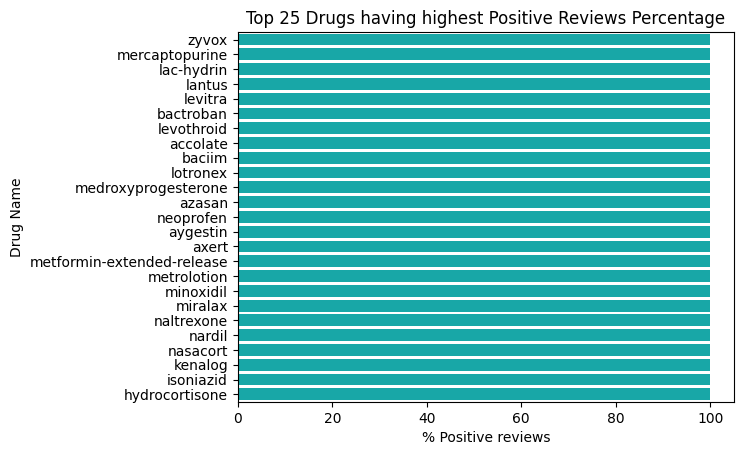

In [ ]:
#Barplot Visualization for the top 25 drugs having most Positive Reviews
#Calculating the top 25 drugs having most Positive Reviews
top_25_drugs_percent_PR = percent_positive_reviews.head(25)

# Plotting the horizontal bar plot on top 25 drugs having most Positive Reviews
sns.barplot(data=top_25_drugs_percent_PR, x='% Positive reviews', y=top_25_drugs_percent_PR.index, color='c')
plt.xlabel('% Positive reviews')
plt.ylabel('Drug Name')
plt.title('Top 25 Drugs having highest Positive Reviews Percentage')
plt.show()

#Sentiment Analysis & Discussion for Part Two

#Drug1: Sample Exploration of Sentiment Analysis for the Drug named 'lexapro'  which has more count of both Negative and Positive Reviews

#These kind of exploration will aid Pharmaceutical companies to understand the specific intensive words being more frequently used in positive or negative reviews for a particular drug and supports them to rectify issues(sideeffects) faced by the patients who consumed those drugs by producing better drugs avoiding sideeffects in future.



#Computing the Compound Scored of Positive and Negative Reviews on Drug named 'lexapro' to visualize the wordcloud of frequently used words in each subsets

In [ ]:
#Computing the Compound Scored of Positive and Negative Reviews on Drug named 'lexapro'
#to visualize the wordcloud of frequently used words in each subsets
reviews_positiveR_lexapro = drugsreview_df.loc[(drugsreview_df['urlDrugName']=='lexapro')
                    & ( drugsreview_df['Compound']>0),:]
reviews_negativeR_lexapro = drugsreview_df.loc[(drugsreview_df['urlDrugName']=='lexapro')
                    & ( drugsreview_df['Compound']<=0),:]

In [ ]:
reviews_positiveR_lexapro.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews,score_label,processed_combinedReviews,Compound,Negative,Neutral,Positive
66,2285,lexapro,6,Moderately Effective,Mild Side Effects,depression,"Before I started on the drug Lexapro, I felt l...",In the first week of treatment I felt disconne...,Lexapro was taken 2 times a day for 2 months.,"Before I started on the drug Lexapro, I felt l...",1,"[start, drug, lexapro, felt, letharg, want, ge...",0.6411,0.081,0.838,0.082
83,2319,lexapro,5,Moderately Effective,Moderate Side Effects,depression and generalized anxiety,I sought treatment for two problems in my life...,"I gained 15 pounds, which my doctor swears was...",I missed an appointment with my doctor and was...,I sought treatment for two problems in my life...,1,"[sought, treatment, two, problem, life, temper...",0.8933,0.116,0.754,0.130
121,2321,lexapro,9,Highly Effective,Mild Side Effects,major depression/anxiety,Before Lexapro I was so depressed I could not ...,I have some difficulty sleeping (waking up in ...,I have found that I have to take it at night ...,Before Lexapro I was so depressed I could not ...,1,"[lexapro, depress, could, function, forc, work...",0.2708,0.163,0.680,0.158
205,2268,lexapro,7,Considerably Effective,Moderate Side Effects,depression/anxiety,Lexapro worked very well to make me feel bette...,I gained ten pounds in the few months that I t...,I've taken several anti-depressants over the y...,Lexapro worked very well to make me feel bette...,1,"[lexapro, work, well, make, feel, better, less...",0.6956,0.070,0.810,0.120
576,2276,lexapro,8,Highly Effective,Mild Side Effects,depression,"helped anxiety & black moods, headaches. Made...",Would not recommend going off lexapro cold tur...,Doctor prescribed lexapro when I had seen him ...,"helped anxiety & black moods, headaches. Made...",1,"[help, anxieti, black, mood, headach, made, li...",0.3403,0.135,0.727,0.138


In [ ]:
reviews_negativeR_lexapro.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews,score_label,processed_combinedReviews,Compound,Negative,Neutral,Positive
198,2262,lexapro,1,Moderately Effective,Severe Side Effects,depression,I felt less sadness.,i felt less of every emotion. i felt emotiona...,I took a whole 10 mg tablet the first time and...,I felt less sadness. i felt less of every emot...,0,"[felt, less, sad, felt, less, everi, emot, fel...",-0.2031,0.027,0.973,0.000
207,2320,lexapro,7,Moderately Effective,Mild Side Effects,depression,Taking Lexapro has become a staple in my life....,The side effects for me included slightly lowe...,I have tried 20 mg per day in divided doses (1...,Taking Lexapro has become a staple in my life....,1,"[take, lexapro, becom, stapl, life, come, extr...",-0.7895,0.138,0.752,0.110
245,2297,lexapro,4,Moderately Effective,Moderate Side Effects,"depression, lack of motivation",My obsessive thoughts completely disappeared. ...,I did not gain or loose weight. My sex drive b...,My dose was increased from 10 mg to 20 mg afte...,My obsessive thoughts completely disappeared. ...,0,"[obsess, thought, complet, disappear, huge, re...",-0.4476,0.137,0.757,0.106
304,2301,lexapro,8,Considerably Effective,Mild Side Effects,depression/anxiety,Significantly decreased depression and suicida...,Initially Lexapro lowered sex drive but this s...,At 15mg patient is able to feel emotions and m...,Significantly decreased depression and suicida...,1,"[significantli, decreas, depress, suicid, impr...",-0.8076,0.202,0.637,0.160
353,2256,lexapro,8,Considerably Effective,Moderate Side Effects,depression,I have clinical depression with aggitation and...,Initially the medication made me very drowsy. ...,I'm not sure waht you mean here- I started on ...,I have clinical depression with aggitation and...,1,"[clinic, depress, aggit, anger, medic, seem, t...",-0.8281,0.123,0.799,0.078


#WordCloud of words from negative reviews on 'lexapro' Drug

In [ ]:
#WordCloud of words from negative reviews on 'lexapro' Drug
#Creating a Single List of all the words(tokens) that appear in all of the negative reviews for this Drug
neg_tokens_lexapro = [word for review in reviews_negativeR_lexapro['processed_combinedReviews'] for word in review]
wordcloud_lexapro_neg = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens_lexapro))
#neg_tokens


#Displaying the generated image of words using for Negative reviews on 'lexapro' Drug

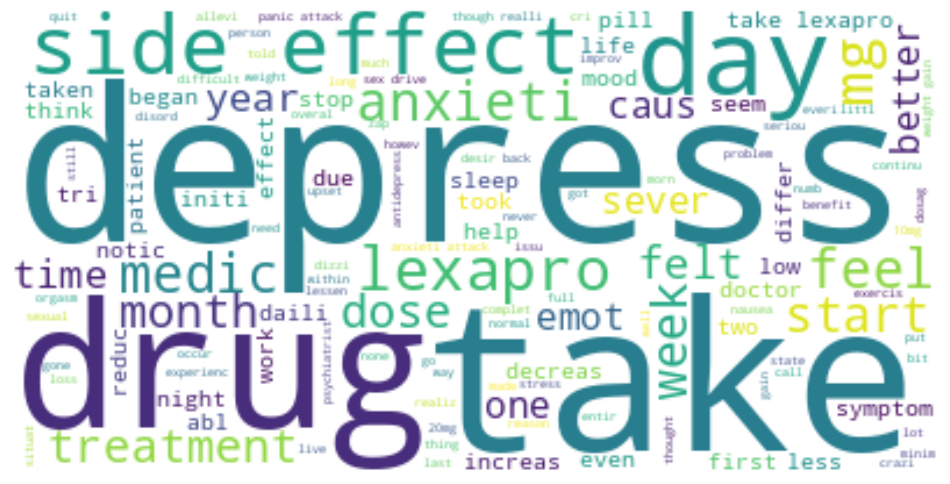

In [ ]:
#Displaying the generated image of words using for Negative reviews on 'lexapro' Drug
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_lexapro_neg, interpolation='bilinear' )
plt.axis("off")
plt.show()

#WordCloud of words from Positive reviews on 'lexapro' Drug

In [ ]:
#WordCloud of words from Positive reviews on 'lexapro' Drug
#Creating a Single List of all the words that appear in all of the positive reviews for this Drug
pos_tokens_lexapro = [word for review in reviews_positiveR_lexapro['processed_combinedReviews'] for word in review]
wordcloud_lexapro_pos = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens_lexapro))
#neg_tokens

#Displaying the generated image of words using for Positive reviews on 'lexapro' Drug

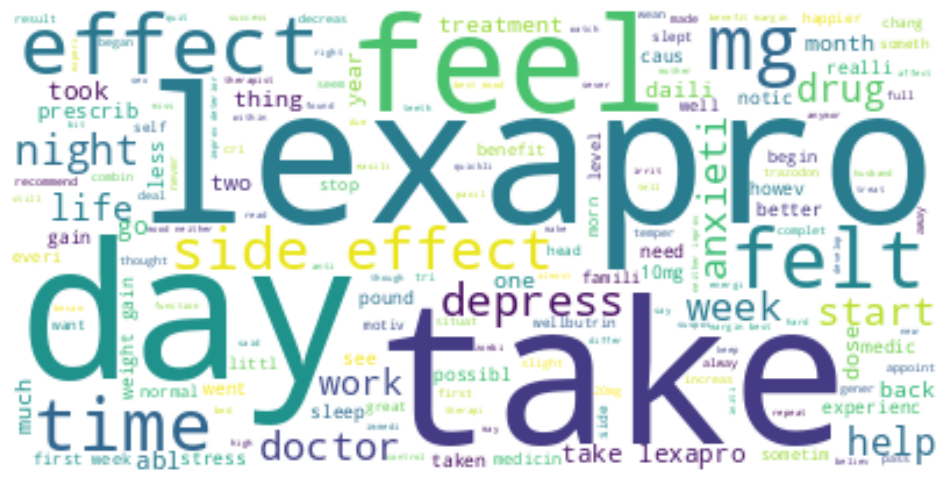

In [ ]:
#Displaying the generated image of words using for Positive reviews on 'lexapro' Drug
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_lexapro_pos, interpolation='bilinear' )
plt.axis("off")
plt.show()

#Computing the Frequency Count(or Frequency Distribution) words in Negative Reviews of 'lexapro' Drug

In [ ]:
#Computing the Frequency Count(or Frequency Distribution) words in Negative Reviews of 'lexapro' Drug
#Using the nltk FrqDist class  and then
#listing the frequencies of top 10 words used in Negative reviews of 'lexapro' Drug using the tabulate() method

#Computing the Frequency Count(or Frequency Distribution) on the words(tokens) used in Negative reviews Using the nltk FrqDist class
#and then listing the frequencies of top 10 words used in Negative reviews using the tabulate() method
from nltk.probability import FreqDist
neg_freqdist_lexapro = FreqDist(neg_tokens_lexapro)
neg_freqdist_lexapro.tabulate(10)
#The words 1)take, 2)depress, 3)days, 4) effect and 5) side are most frequently used in Negative Reviews of 'lexapro' Drug
#Moreover, these negative reviews notably portrays that the Patients consumed(taken) "lexapro" drug
# could be critically facing depression and other side effects for some days.

   take depress lexapro     day  effect    drug    side anxieti      mg   would 
     59      53      52      46      45      38      36      31      30      27 


#Plotting the Frequency Distribution Graph on the Negative reviews tokens of 'lexapro'

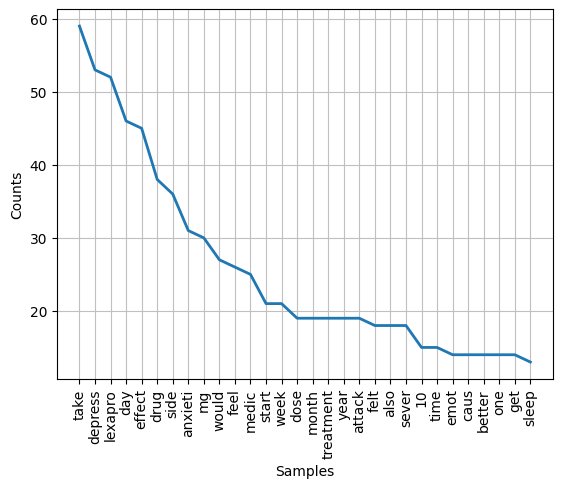

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Plotting the Frequency Distribution Graph on the Negative reviews tokens of 'lexapro'
neg_freqdist_lexapro.plot(30)
##Analysis on this Frequesncy Distribution Graph: excluding the Drug name 'lexapro',
#The words 1) take and 2) depress, 3) effect and 4) side are most frequently used in Negative Reviews of 'lexapro' Drug

#Computing the Frequency Count(or Frequency Distribution) words in Positive Reviews of 'lexapro' Drug

In [ ]:
#Computing the Frequency Count(or Frequency Distribution) words in Positive Reviews of 'lexapro' Drug
#Using the nltk FrqDist class  and then
#listing the frequencies of top 10 words used in Positive reviews of 'lexapro' Drug using the tabulate() method
from nltk.probability import FreqDist
pos_freqdist_lexapro = FreqDist(pos_tokens_lexapro)
pos_freqdist_lexapro.tabulate(10)
#Analysis on this Frequesncy Distribution Graph: excluding the Drug name 'lexapro',
#The words 1)take, 2) effect, 3)feel and 4)side are most frequently used in Negative Reviews of 'lexapro' Drug
#Moreover, these positive reviews on "lexapro" drug notably portrays that the Patients consumed(taken)
# mentioned positive reviews on its side Effects too

   take lexapro  effect     day    feel    side    felt    week      mg     get 
     44      42      41      30      28      23      22      20      19      18 


#Plotting the Frequency distibution Graph on the words used in the positive reviews of 'lexapro' Drug

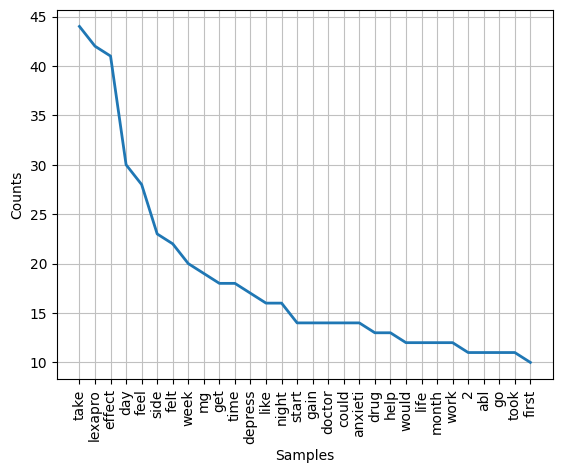

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Plotting the Frequency Distribution Graph on the Positive reviews tokens of 'lexapro'
pos_freqdist_lexapro.plot(30)

#Drug1: Sample Exploration of Sentiment Analysis for the Drug named 'retin-a' which also an another example of having more count of both Negative and Positive Reviews/scores
**Exploration of Positive and Negative Reviews of Drug named 'retin-a'**<br/> This helps in understanding what words being more frequently used in positive or negative reviews for a particular drug.

#Computing the Compound Scored of Positive and Negative Reviews on Drug named 'retin-a' to visualize the wordcloud of frequently used words in each subsets

In [ ]:
#Computing the Compound Scored of Positive and Negative Reviews on Drug named 'retin-a'
#to visualize the wordcloud of frequently used words in each subsets
reviews_positiveR_retina = drugsreview_df.loc[(drugsreview_df['urlDrugName']=='retin-a')
                    & ( drugsreview_df['Compound']>0),:]
reviews_negativeR_retina  = drugsreview_df.loc[(drugsreview_df['urlDrugName']=='retin-a')
                    & ( drugsreview_df['Compound']<=0),:]

#WordCloud of words from negative reviews on 'retin-a' Drug

In [ ]:
#WordCloud of words from negative reviews on 'retin-a' Drug
#Creating a Single List of all the words(tokens) that appear in all of the negative reviews for this Drug
neg_tokens_retina = [word for review in reviews_negativeR_retina['processed_combinedReviews'] for word in review]
wordcloud_retina_neg = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens_retina))
#neg_tokens

#Displaying the generated image of words using for Negative reviews on 'lexapro' Drug

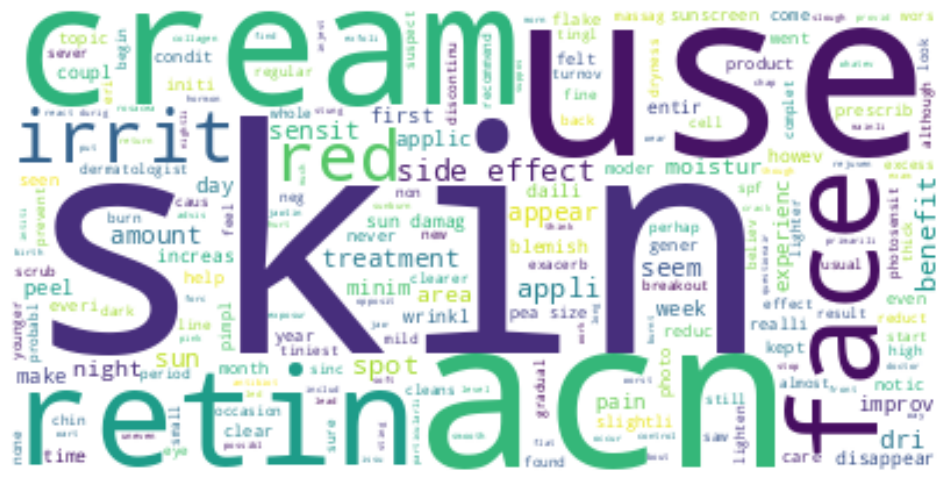

In [ ]:
#Displaying the generated image of words using for Negative reviews on 'lexapro' Drug
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_retina_neg, interpolation='bilinear' )
plt.axis("off")
plt.show()

#WordCloud of words from positive reviews on 'retin-a' Drug

In [ ]:
#WordCloud of words from positive reviews on 'retin-a' Drug
#Creating a Single List of all the words(tokens) that appear in all of the negative reviews for this Drug
pos_tokens_retina = [word for review in reviews_positiveR_retina['processed_combinedReviews'] for word in review]
wordcloud_retina_pos = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens_retina))

#Displaying the generated image of words using for Negative reviews on 'lexapro' Drug

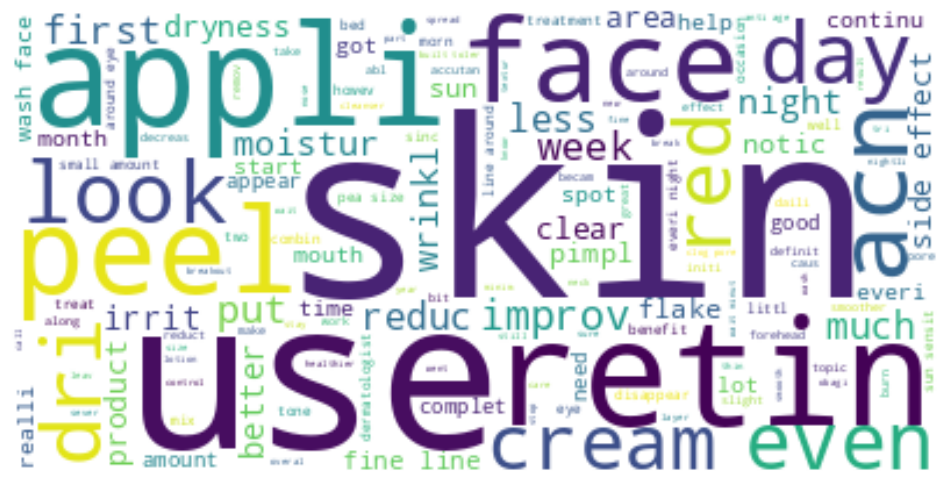

In [ ]:
#Displaying the generated image of words using for Negative reviews on 'lexapro' Drug
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_retina_pos, interpolation='bilinear' )
plt.axis("off")
plt.show()

#Computing the Frequency Count(or Frequency Distribution) words in Negative Reviews of 'retina' Drug

In [ ]:
#Computing the Frequency Count(or Frequency Distribution) words in Negative Reviews of 'retina' Drug
#Using the nltk FrqDist class  and then
#listing the frequencies of top 10 words used in Negative reviews of 'retina' Drug using the tabulate() method

#Computing the Frequency Count(or Frequency Distribution) on the words(tokens) used in Negative reviews Using the nltk FrqDist class
#and then listing the frequencies of top 10 words used in Negative reviews using the tabulate() method
from nltk.probability import FreqDist
neg_freqdist_retina = FreqDist(neg_tokens_retina)
neg_freqdist_retina.tabulate(15)
#The words 1)skin, 2)use, 3)acn, 4)sun, 5)effect, 6)face and 7)irrit are most frequently used in Negative Reviews of 'retina' Drug.
#Since cream and retin drugs name and type
#Moreover, these negative reviews notably portrays that the Patients using(use)) "retina" drug
# could be critically facing related to skin sesnsitivity issues especially acne & spots, irritating sensation and other side effects

     skin       use       acn     cream     retin    effect       sun      face     irrit      side       red   benefit     appli      spot treatment 
       30        15        12        12        12        11        11        10        10         9         9         8         8         8         7 


#Plotting the Frequency Distribution Graph on the Negative reviews tokens of 'retina'

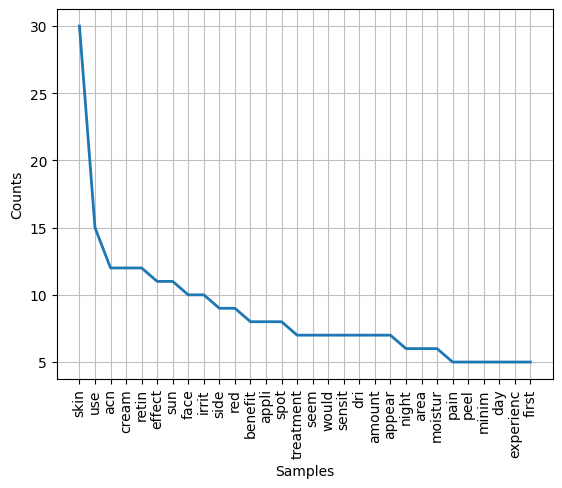

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Plotting the Frequency Distribution Graph on the Negative reviews tokens of 'retina'
neg_freqdist_retina.plot(30)
##Analysis on this Frequesncy Distribution Graph: excluding the Drug name 'retina',
#The words 1) take and 2) depress, 3) effect and 4) side are most frequently used in Negative Reviews of 'retina' Drug

#Computing the Frequency Count(or Frequency Distribution) words in Positive Reviews of 'retina' Drug

In [ ]:
#Computing the Frequency Count(or Frequency Distribution) words in Positive Reviews of 'retina' Drug
#Using the nltk FrqDist class  and then
#listing the frequencies of top 10 words used in Positive reviews of 'retina' Drug using the tabulate() method
from nltk.probability import FreqDist
pos_freqdist_retina = FreqDist(pos_tokens_retina)
pos_freqdist_retina.tabulate(20)
#Analysis on this Frequesncy Distribution Graph: excluding the Drug name 'retina',
#The words 1)skin, 2)use, 3)face, 4)appli and 5)peel and 6)acn are most frequently used in Positive Reviews of 'retina' Drug.
#retina word is drug's name hence not considering its frequency

#Inspite of positive reviews, it notably portrays that the Patients using or applying(use or appli) "retina" drug it dries(dri) skin
#and patients could be experiencing skin relevant issues especially on peeling sensation, acne formation
#and reddishness(red) beside improvements (improv)

  skin    use   face  retin  appli   peel  would    acn   look    get    day  night    dri   even    red  cream improv around   line   also 
    72     50     34     32     29     28     21     19     17     17     17     17     16     15     15     15     14     14     13     13 


#Plotting the Frequency Distribution Graph on the Positive reviews tokens of 'retina'

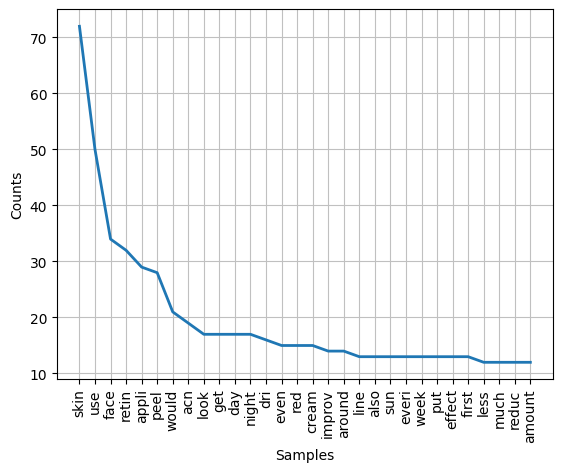

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Plotting the Frequency Distribution Graph on the Positive reviews tokens of 'retina'
pos_freqdist_retina.plot(30)

#Conclusion:

#The above analysis, focusing on two drugs, 'lexapro' and 'retin-a,' has unveiled a diverse spectrum of sentiment data. This exploration of patient feedback and feelings from various perspectives serves as a valuable resource for healthcare stakeholders, including pharmaceutical industries, hospitals, and medical practice centers.

#Part Three: Sentiment Analysis using Textblob library in Python

In [ ]:
pip install textblob

#Definition of the textblob_analyze_sentiment() function used for Computing the Sentiment Polarity of the Given Review using the the Textblob NLP library in Python

In [ ]:
#Definition of the textblob_analyze_sentiment() function used for Computing the Sentiment Polarity of the Given Review
#using the the Textblob NLP library in Python

#textblob_analyze_sentiment() function created to compute the Sentiment Polarity of the Given Review (review_text)
from textblob import TextBlob
def textblob_analyze_sentiment(review_text):
    textblob_analysis = TextBlob(review_text)
    # Classifying the the Sentiment polarity as Positive, Negative, or Neutral
    if textblob_analysis.sentiment.polarity > 0:
        return 'Positive'
    elif textblob_analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

#Applying thetextblob_analyze_sentiment function() to calculate the sentiment polarity for each review, and assigning the resulting list of scores to the new column named as 'Sentiment_Polarity' of the same DataFrame "drugsreview_df".

In [ ]:
#Applying thetextblob_analyze_sentiment function() to calculate the sentiment polarity for each review, and assigning the resulting list of
#scores to the new column named as 'Sentiment_Polarity' of the same DataFrame "drugsreview_df".
drugsreview_df['Sentiment_Polarity'] = [textblob_analyze_sentiment(review) for review in drugsreview_df['combinedReviews']]

In [ ]:
drugsreview_df.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews,score_label,processed_combinedReviews,Compound,Negative,Neutral,Positive,Sentiment_Polarity
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...,0,"[slow, progress, left, ventricular, dysfunct, ...",-0.9666,0.339,0.661,0.000,Negative
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...,0,"[although, type, birth, control, con, pro, hel...",-0.8945,0.141,0.818,0.040,Positive
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...,1,"[use, cramp, badli, would, leav, ball, bed, le...",0.6297,0.095,0.787,0.118,Negative
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...,0,"[acid, reflux, went, away, month, day, drug, h...",-0.6486,0.049,0.951,0.000,Negative
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...,0,"[think, lyrica, start, help, pain, side, effec...",-0.5719,0.106,0.859,0.035,Negative


#Sentiment Analysis & Discussion for Part Three


#Finding the total number of Positive, Negative and Neutral reviews computed using the textblob NLP Library.

In [ ]:
#Finding the total number of Positive, Negative and Neutral reviews computed using the textblob NLP Library
drugsreview_df['Sentiment_Polarity'].value_counts()
# According to the below finding there are more positive reviews and one third of negative reviews and very negligible neutral reviews

Positive    2143
Negative     888
Neutral       76
Name: Sentiment_Polarity, dtype: int64

#Listing the Drugs that have "Positive" Sentiment Polarity.

In [ ]:
#Listing the Drugs that have "Positive" Sentiment Polarity
drugsreview_df[drugsreview_df['Sentiment_Polarity'] == "Positive"].groupby('urlDrugName').size().sort_values(ascending=False)

urlDrugName
lexapro            48
zoloft             37
prozac             36
retin-a            35
paxil              29
                   ..
periogard           1
periostat           1
phendimetrazine     1
pilocarpine         1
zyvox               1
Length: 438, dtype: int64

#From the above output the Drugs named "lexapro" leads first with 48 number of Positive reviews followed by "zoloft" in second place with 37 number of Positive reviews and "prozac" in the third place with 36 number of Positive reviews.

In [ ]:
# Overviewing the "Positive" Sentiment Polarity of the drug named "lexapro"
drugsreview_df[(drugsreview_df['Sentiment_Polarity'] == "Positive") & (drugsreview_df['urlDrugName'] == "lexapro" )]

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,combinedReviews,score_label,processed_combinedReviews,Compound,Negative,Neutral,Positive,Sentiment_Polarity
66,2285,lexapro,6,Moderately Effective,Mild Side Effects,depression,"Before I started on the drug Lexapro, I felt l...",In the first week of treatment I felt disconne...,Lexapro was taken 2 times a day for 2 months.,"Before I started on the drug Lexapro, I felt l...",1,"[start, drug, lexapro, felt, letharg, want, ge...",0.6411,0.081,0.838,0.082,Positive
83,2319,lexapro,5,Moderately Effective,Moderate Side Effects,depression and generalized anxiety,I sought treatment for two problems in my life...,"I gained 15 pounds, which my doctor swears was...",I missed an appointment with my doctor and was...,I sought treatment for two problems in my life...,1,"[sought, treatment, two, problem, life, temper...",0.8933,0.116,0.754,0.130,Positive
121,2321,lexapro,9,Highly Effective,Mild Side Effects,major depression/anxiety,Before Lexapro I was so depressed I could not ...,I have some difficulty sleeping (waking up in ...,I have found that I have to take it at night ...,Before Lexapro I was so depressed I could not ...,1,"[lexapro, depress, could, function, forc, work...",0.2708,0.163,0.680,0.158,Positive
198,2262,lexapro,1,Moderately Effective,Severe Side Effects,depression,I felt less sadness.,i felt less of every emotion. i felt emotiona...,I took a whole 10 mg tablet the first time and...,I felt less sadness. i felt less of every emot...,0,"[felt, less, sad, felt, less, everi, emot, fel...",-0.2031,0.027,0.973,0.000,Positive
207,2320,lexapro,7,Moderately Effective,Mild Side Effects,depression,Taking Lexapro has become a staple in my life....,The side effects for me included slightly lowe...,I have tried 20 mg per day in divided doses (1...,Taking Lexapro has become a staple in my life....,1,"[take, lexapro, becom, stapl, life, come, extr...",-0.7895,0.138,0.752,0.110,Positive
245,2297,lexapro,4,Moderately Effective,Moderate Side Effects,"depression, lack of motivation",My obsessive thoughts completely disappeared. ...,I did not gain or loose weight. My sex drive b...,My dose was increased from 10 mg to 20 mg afte...,My obsessive thoughts completely disappeared. ...,0,"[obsess, thought, complet, disappear, huge, re...",-0.4476,0.137,0.757,0.106,Positive
507,2294,lexapro,8,Considerably Effective,Mild Side Effects,depression,The benefits were that once I started taking i...,"If I missed taking a dose, I would feel a bit ...","After a break-up, I was very depressed and ups...",The benefits were that once I started taking i...,1,"[benefit, start, take, becam, less, emot, got,...",-0.7431,0.154,0.731,0.115,Positive
521,2263,lexapro,6,Moderately Effective,No Side Effects,peri-menopausal syptoms,I was experiencing a lot of hot flashes and I ...,I haven't noticed any side effects.,I take one tablet each morning. I have been o...,I was experiencing a lot of hot flashes and I ...,1,"[experienc, lot, hot, flash, think, subsid, fr...",0.0000,0.000,1.000,0.000,Positive
614,2283,lexapro,6,Moderately Effective,Mild Side Effects,depression,"less irritability, slept better. Was less hungry.","mild mania, manifested by spending more money....",Was put on paxil which was quite effective but...,"less irritability, slept better. Was less hung...",1,"[less, irrit, slept, better, less, hungri, mil...",0.9500,0.090,0.647,0.263,Positive
617,2306,lexapro,6,Marginally Effective,No Side Effects,depression,The treatment benefits were marginal at best. ...,"On the plus side, I experienced no major side ...","The pills are administered once a day, daily, ...",The treatment benefits were marginal at best. ...,1,"[treatment, benefit, margin, best, mood, neith...",0.8918,0.073,0.763,0.164,Positive


#Listing the Drugs that have "Negative" Sentiment Polarity.

In [ ]:
#Listing the Drugs that have "Negative" Sentiment Polarity
drugsreview_df[drugsreview_df['Sentiment_Polarity'] == "Negative"].groupby('urlDrugName').size().sort_values(ascending=False)


urlDrugName
synthroid      19
lexapro        15
valtrex        12
doxycycline    11
chantix        10
               ..
ponstel         1
phenergan       1
periogard       1
pepcid          1
lybrel          1
Length: 308, dtype: int64

#From the above output the Drugs named "synthroid" leads first with 19 number of negative reviews followed by "lexapro" in second place with 15 number of  negative reviews and "valtrex" in the third place with 15 number of negative reviews according to the sentiment polarity Analysis using the Textblob Library.

#Conclusion:<br/>
#Below computes the count of  Positive, Negative and Neutral sentiment polarities individually.

In [ ]:
#Below computes the count of  Positive, Negative and Neutral sentiment polarities individually
sentiment_counts = drugsreview_df.groupby(['urlDrugName', 'Sentiment_Polarity']).size().unstack(fill_value=0)
# Displaying the resulting filter command of sentiment_counts
print(sentiment_counts)

Sentiment_Polarity  Negative  Neutral  Positive
urlDrugName                                    
abilify                    2        0         3
accolate                   0        0         1
accupril                   0        0         1
accutane                   6        0        22
aciphex                    1        0         2
...                      ...      ...       ...
zyban                      3        0         7
zyprexa                    2        1         2
zyrtec                     9        2        12
zyrtec-d                   0        0         3
zyvox                      0        0         1

[502 rows x 3 columns]


#The Output DataFrame is also stored in a CSV file named as "Sentiment_Polarity.csv" for further investigation specific to each Drug that could be support the Healthcare clients such as Hospitals or pharmaceutical companies to greater extent to improve their Drug product.

In [ ]:
#The Output dataframe is also stored in a CSV file named as "Sentiment_Polarity.csv" for further investigation
#specific to each Drug by the Healthcare clients such as Hospitals or pharmaceutical companies
sentiment_counts.to_csv("Sentiment_Polarity.csv")


<h1>CONCLUSION:</h1>
<p align='justify'> <b><big>
Machine learning Approach of Text mining of Part One task proved less effective in predicting the sentiment of the given Drugs reviews. Conversely, the sentiment analysis conducted on the same Drugs reviews dataset in Part Two and Three have performed well in giving profound insightful sentiment analysis, offering a valuable opportunity to deep dive to explore and tackle business-related insights and the root causes of underlying issues. Thus, application of nltk libary and textblob seem exceedingly well performed in predicting the sentiment analysis than the ML Model training using Bayes MultinomialNB Classifier. </big></b> <br/>
 </p><p align='justify'><b>
The resultant DataFrames of PART TWO & PART THREE are saved in CSV file format in the names of "drugsreview_df.csv" and "Sentiment_Polarity.csv," in order to facilitate the in-depth analysis tailored to individual drugs. These file resources could significantly benefit healthcare clients, including hospitals and pharmaceutical companies, empowering them to enhance their drug products. Leveraging Business Intelligence tools like PowerBI or Tableau enables comprehensive comparative exploratory analysis on the sentiment Anlysis & Sentiment Polarity of each drug, providing valuable insights for the clients.</b>
 </p>